# Gauss elimination to determine the determinant of the array

In [1]:
import numpy as np

def array(A):
    """
    A is the array that the user defines when calling the function
    
    """
    
    # Get the number of rows of the array
    n = len(A)
    
    """
    Use Gauss elimination in order to calculate the determinant of the array
    
    """
    p = 0 # Initialize a variable to count how many times a row is pivoted
            
    for j in range(n): # Use pivoting even if the diaginal element is non-zero, in order to reduce truncation errors 
                       # in the results
        
        B = abs(A[:, j]) # Take one column of the array A in every loop with absolute elements
        B_below = np.array([B[i] for i in range(j, n)]) # Define an array that contains all the elements under the diagonical
                                                        # element of the initial array A
       
        # Check if B_below is not empty before finding the maximum
        if B_below.size > 0:
            
            # Find the absolute maximum element between the elements under the column of the diagonal element of A
            if B[j] != np.max(B_below): 

                max_row_idx = np.argmax(B == np.max(B_below)) # This index corresponds to the row of A that contains the maximum diagonical
                                                        # element

                A[[j, max_row_idx]] = A[[max_row_idx, j]] # Swap the rows (pivoting)
                
                p+=1 # Count pivoting

            if A[j, j] != 0: # Do an extra test in addition to pivoting for each diagonal element 
                
                # Implementation of the Gauss elimination
                for i in range(j + 1, n):

                    m = (A[i, j]/A[j, j])

                    A[i, :] -= A[j, :] * m

            else:
                print("The method fails because the diagonal element: ", i, j, "is zero")
                break
           
        else:
            # Handle the case when B_below is empty (zero-size array)
            print("B_below is empty. Skipping iteration.")
   
    A = np.round(A, 4) # Round the values with 4 digits
    return (A, p)

# Define the array
A = np.array([[4, 1, 2, 3, 5],
             [1, 3, 1, 4, 2],
             [2, 1, 5, 2, 3],
             [3, 4, 2, 4, 1],
             [5, 2, 3, 1, 5]], dtype=np.float64)

# Call the function
[I, p] = array(A)
print("The triangle matrix after Gauss elimination is: ", "\n", I)
print("\nThe number of times that rows are pivoted is p= ", p)


The triangle matrix after Gauss elimination is:  
 [[ 5.      2.      3.      1.      5.    ]
 [ 0.      2.8     0.2     3.4    -2.    ]
 [ 0.      0.      3.7857  1.3571  1.1429]
 [ 0.      0.      0.      3.0566  0.6792]
 [ 0.     -0.      0.      0.      2.6667]]

The number of times that rows are pivoted is p=  3


# Determinant of the initial matrix A

In [3]:
# Size of the triangle array
n = len(A[:, 1])

# Create a list were the diagonal elements are saved
aij_list = [A[i, i] for i in range(n)]

# Multiple the diagonal elements
D = 1
for j in(aij_list):
    D = D*j

# Add the sign according to the number of pivotings
D = D*(-1)**p 

if D != 0:
    print("The determinant of the initial array A is D = ", round(D, 4))
    print("\nThe matrix is ivertible")

The determinant of the initial array A is D =  -432.0

The matrix is ivertible


# LU Decomposition


## Find L and U arrays

In [57]:
import numpy as np

def LU(A):
    
    # Check if the matrix is a n x n matrix
    n1 = len(A[0, :]) # Number of columns
    
    n2 = len(A[:, 0]) # Number of rows
    
    if n1 != n2:
        print("Please insert a (n x n) matrix and try again\n")
    
    else:
        
        n = n1  # Size of the matrix
    
        L = np.eye(n) # Create an array of size A with zeros and diagonal elements equal to 1 

        U =np.array([[0.0] * n for i in range(n)]) # Create an array of size A with zeros

        """ Step 1 """
        # Calculate the first row of array U
        j = 0
        for i in range(n):
            if j == 0:
                U[j][i] = (A[j, i])

        # Calculate the first column of array L
        i = 0
        for j in range(1, n):
            if i == 0:
                L[j][i] = A[j, i]/U[i, i]

        """ Step 2 """
        # Calculate the non-zero elements of array U and L
        for i in range(1, n):

            # Non-zero elements of U
            for j in range(i, n):
                s1 = sum(L[i][k]*U[k][j] for k in range(i))
                U[i][j] = A[i, j] - s1

            # Non-zero elements of L
            for j in range(i, n):  

                s2 = sum(L[j][k]*U[k][i] for k in range(i))
                L[j][i] = (A[j][i] - s2) / U[i][i]
            
    return (L, U)

# Define the array for the LU decomposition
A = np.array([[4, 1, 2, 3, 5],
                  [1, 3, 1, 4, 2],
                  [2, 1, 5, 2, 3],
                  [3, 4, 2, 4, 1],
                  [5, 2, 3, 1, 5]], dtype=np.float64)

# Call the function
[L, U] = LU(A)

print("The L matrix is:\n", L)
print("\nThe U matrix is:\n", U)

# Check if the multipication of L and U returns the initial array A
M = np.dot(L, U)
print("\nThe multiplication of the L, U arrays returns:\n", M)

if M.all() == A.all():
    print("\nWhich is equal to the initial array A")

The L matrix is:
 [[ 1.          0.          0.          0.          0.        ]
 [ 0.25        1.          0.          0.          0.        ]
 [ 0.5         0.18181818  1.          0.          0.        ]
 [ 0.75        1.18181818 -0.02325581  1.          0.        ]
 [ 1.25        0.27272727  0.09302326  1.73333333  1.        ]]

The U matrix is:
 [[ 4.          1.          2.          3.          5.        ]
 [ 0.          2.75        0.5         3.25        0.75      ]
 [ 0.          0.          3.90909091 -0.09090909  0.36363636]
 [ 0.          0.          0.         -2.09302326 -3.62790698]
 [ 0.          0.          0.          0.          4.8       ]]

The multiplication of the L, U arrays returns:
 [[4. 1. 2. 3. 5.]
 [1. 3. 1. 4. 2.]
 [2. 1. 5. 2. 3.]
 [3. 4. 2. 4. 1.]
 [5. 2. 3. 1. 5.]]

Which is equal to the initial array A


In [5]:
import numpy as np
from scipy.linalg import solve_triangular

# Initialize an array of zeros to store the values of the inverse array
A_inv = np.zeros((n, n))

for i in range(n):
    
    # Update b array in order to calculate in each loop the correspondig column of the inverse array of A
    b = np.zeros((n, 1))
    b[i] = 1.0

    # Solve the system Ly = b
    y = solve_triangular(L, b, lower=True) # Lower is True if array L is the lower matrix

    # Solve the system Ux = b
    x = solve_triangular(U, y, lower=False) # Lower is False if array U is the upper matrix
    
    # Use ravel method of NumPy to convert the column vectors to 1D arrays before assigning them to the columns of A_inv
    x = x.ravel()
    
    # Store the values to the corresponding columns
    A_inv[:, i] = x
    
print("The inversible array of A is:\n", A_inv)

# Verify A * A_inv ≈ I
I = np.dot(A, A_inv)
I = np.round(I, 4) # Round the digits

print("\nThe multiplication of the A and A_inversible arrays returns:\n", I)

I_th  = np.eye(n) # Define the identity matrix

# Check if I_th is indeed the identity matrix
if I.all() == I_th.all():
    print("\nThe matrix that the multiplication of the A and A_inversible returns is indeed the identity matrix")

The inversible array of A is:
 [[ 0.24537037 -0.45833333 -0.10185185  0.34259259 -0.06944444]
 [-0.45833333  0.375      -0.08333333 -0.08333333  0.375     ]
 [-0.10185185 -0.08333333  0.25925926  0.03703704 -0.02777778]
 [ 0.34259259 -0.08333333  0.03703704  0.14814815 -0.36111111]
 [-0.06944444  0.375      -0.02777778 -0.36111111  0.20833333]]

The multiplication of the A and A_inversible arrays returns:
 [[ 1.  0. -0.  0.  0.]
 [-0.  1.  0.  0. -0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1. -0.]
 [ 0.  0. -0. -0.  1.]]

The matrix that the multiplication of the A and A_inversible returns is indeed the identity matrix


In [59]:
import numpy as np

def Power(A, tol):
    
    # Check if the matrix is a n x n matrix
    n1 = len(A[0, :]) # Number of columns
    
    n2 = len(A[:, 0]) # Number of rows
    
    if n1 != n2:
        print("Please insert a (n x n) matrix and try again\n")
    
    else:
        
        n = n1  # Size of the matrix
        
        # Initialize a random vector as an approximation to the eigenvector
        x = np.random.rand(n)
        print("The initial guess of the eigenvector is: ", x)
        # Set maximum iterations (random)
        k = 50
        
        """ Start of the convergence """

        j = 1 # Initialize a variable to count the number of iterations
        
        eigenvalue_o = np.max(x) / np.max(x) # Initialize eigenvalue_o to the first approximation
        
        e = 1 # Initialize the relative error
        
        data = [(j, eigenvalue_o, e)] # Define a list to store the values in each iteration that also contains the initial values

        for i in range(k):
            
            # Calculate the new approximation of the eigenvector
            x_new = np.dot(A, x) # x = Ax
            
            # Calculate the new approximation of the eigenvalue as the ratio of the largest components between x_new and x
            eigenvalue = np.max(x_new) / np.max(x)
            
            e = abs((eigenvalue - eigenvalue_o)/eigenvalue) 
            if e < tol: 
                data.append((j, eigenvalue_o, e)) # Update one last time the data list
                break

            # Normalize the eigenvector to the largest component of x vector
            eigenvector = x_new / np.max(x_new)

            # Store the current approximation for the eigenvalue 
            eigenvalue_o = eigenvalue  
            
            # x_new becomes x_old before the next iteration
            x = x_new

            # Increase the variable
            j+=1
            
            # Store the values to a list
            data.append((j, eigenvalue_o, e))
        
    return(eigenvalue, eigenvector, j, data)

# Define the array
A = np.array([[4, 1, 2, 3, 5],
             [1, 3, 1, 4, 2],
             [2, 1, 5, 2, 3],
             [3, 4, 2, 4, 1],
             [5, 2, 3, 1, 5]], dtype=np.float64)

# Define the tolerance for the eigenvalue and eigenvector approximations 
tol = 1e-4

# Call the function
[l, x, j, data] = Power(A, tol)

print("\nThe largest eigenvalue of array A is λ = ", l)
print("\nThe corresponding eigenvector is x = ", x)
print("\nThe number of iterations that were needed for this result and these initial conditions, is: ", j)

The initial guess of the eigenvector is:  [0.89712069 0.79668956 0.53452918 0.55988029 0.81424909]

The largest eigenvalue of array A is λ =  14.075996106518286

The corresponding eigenvector is x =  [0.94456884 0.6181127  0.77879908 0.78052926 1.        ]

The number of iterations that were needed for this result and these initial conditions, is:  8


# Display the convergence

The rate of convergence for the Power method is: -1.3547406116455067


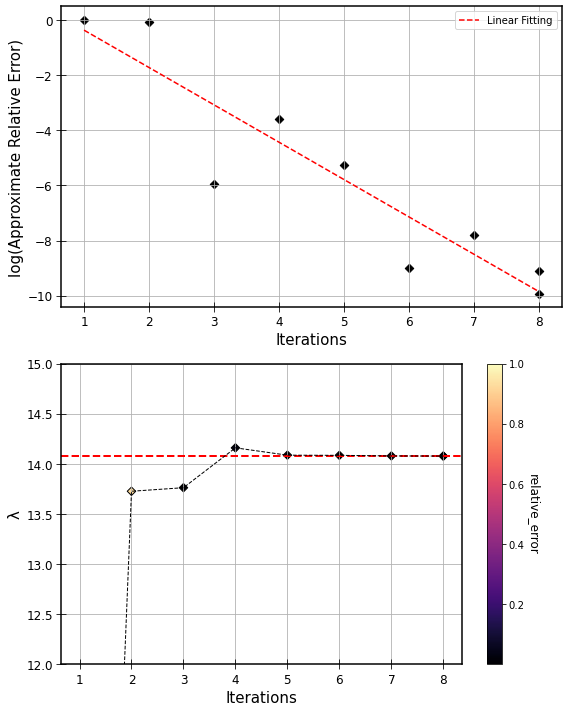

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import math

""" Display the convergence """

# Convert to DataFrame
df = pd.DataFrame(data, columns=['iterations', 'eigenvalue', 'relative_error'])

fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (8, 10))

n = len(df['relative_error'])
df['log(e)'] = df['relative_error'].apply(lambda x: math.log(x))

ax1.scatter(df['iterations'], df['log(e)'], marker = 'D', c = 'black')

# Linear Fitting for log(e) - Iterations
xy = np.sum(df['iterations']*df['log(e)'])
x2 = np.sum(df['iterations']**2)
c = (n*xy - np.sum(df['iterations'])*np.sum(df['log(e)']))/(n*x2 - (np.sum(df['iterations']))**2)
print('The rate of convergence for the Power method is:', c)
b = ((x2*np.sum(df['log(e)'])) - xy*np.sum(df['iterations']))/(n*x2 - (np.sum(df['iterations']))**2)
y = c*df['iterations'] + b

ax1.plot(df['iterations'], y, label='Linear Fitting', linestyle='--', color='red')

# Customize the plot
ax1.grid(True)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(12)
ax1.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.set_xlabel("Iterations", fontsize=15)
ax1.set_ylabel("log(Approximate Relative Error)", fontsize=15)
ax1.legend()

# Second Plot
scatter = ax2.scatter(df['iterations'], df['eigenvalue'], marker = 'D', c=df['relative_error'], cmap='magma', edgecolors='black', alpha=1)

# Customize the plot
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
ax2.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.set_xlabel("Iterations", fontsize=15)
ax2.set_ylabel("λ", fontsize=15)
ax2.axhline(14.07452132605389, color = 'red', linestyle='dashed', linewidth =2)
ax2.grid(True)
ax2.plot(df['iterations'], df['eigenvalue'], color = 'black', linestyle = 'dashed', linewidth =1)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('relative_error', rotation=270, labelpad=15, fontsize=12)
ax2.set_ylim(12, 15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()